In [1]:
from __future__ import unicode_literals

import lal
import lalsimulation
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

%matplotlib inline
%config InlineBackend.figure_format='retina'

In [2]:
style = "times"

if style=="times":
    plt.style.use('/home/hosilva/tools/mplstyle/timesnromanstyle.mplstyle')
else:
    plt.style.use('/home/hosilva/tools/mplstyle/computermodernstyle.mplstyle')

In [101]:
data_GW150914_gr   = np.genfromtxt("/home/hosilva/parspec/pe/GW150914/parspec_runs/gr/cbcBayes/posterior_samples.dat", names=True, dtype=None)
data_GW150914_cs   = np.genfromtxt("/home/hosilva/parspec/pe/GW150914/parspec_runs/p4_l_df0_dtau0_CS_220203_1052/cbcBayes/posterior_samples.dat", names=True, dtype=None)

In [103]:
GW150914_gr   = np.vstack([data_GW150914_gr['chi_eff'], data_GW150914_gr['redshift'], data_GW150914_gr['m1'], data_GW150914_gr['m2'], data_GW150914_gr['mtotal'], data_GW150914_gr['mf_evol'], data_GW150914_gr['af_evol']]).T
GW150914_cs   = np.vstack([data_GW150914_cs['chi_eff'], data_GW150914_cs['redshift'], data_GW150914_cs['m1'], data_GW150914_cs['m2'], data_GW150914_cs['mtotal'], data_GW150914_cs['mf_evol'], data_GW150914_cs['af_evol']]).T

Same type of plots, but using ChainConsumer

In [5]:
from chainconsumer import ChainConsumer

In [17]:
param_list = [r"$\chi_{\rm eff}$", r"$z$",
              r"$m_1 \, [M_{\odot}]$", r"$m_2 \, [M_{\odot}]$", r"$M \, [M_{\odot}]$",
              r"$M_{\rm f} \, [M_{\odot}]$", r"$\chi_{\rm f}$"]

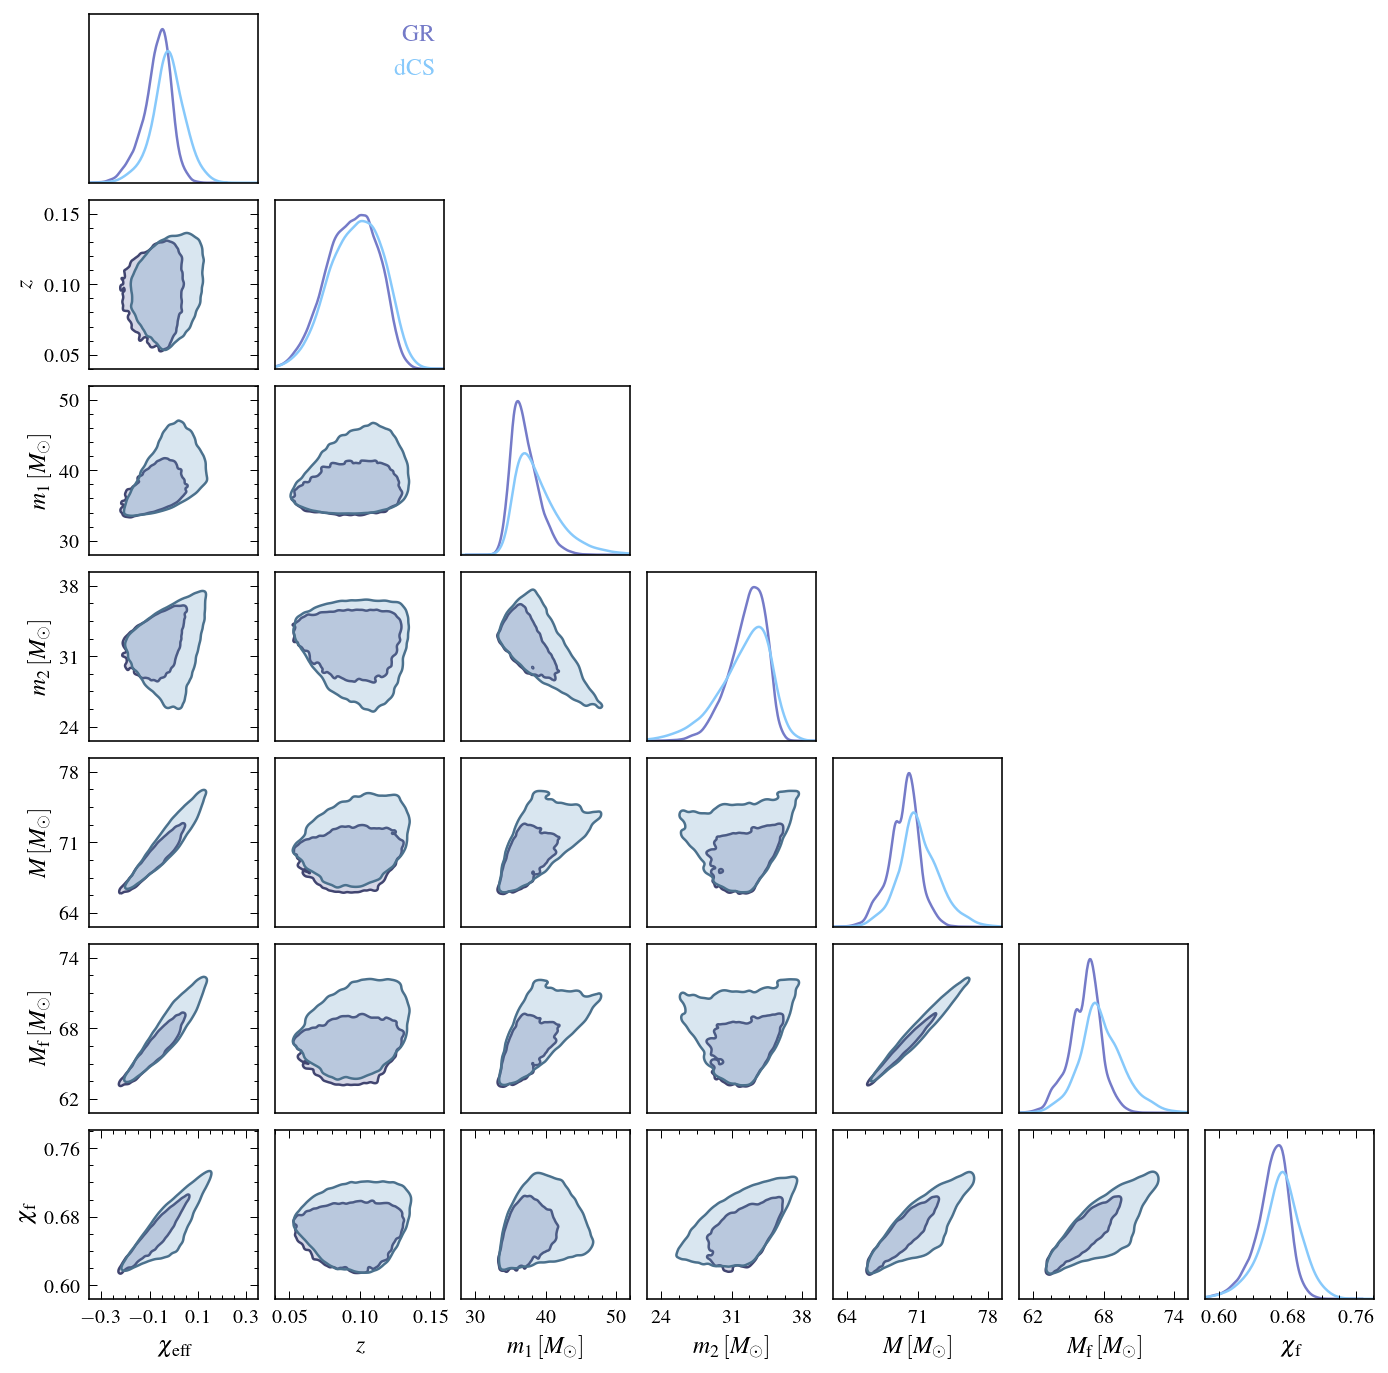

In [100]:
c = ChainConsumer()

c.add_chain(GW150914_gr, parameters=param_list,
            name="GR")

c.add_chain(GW150914_cs, parameters=param_list, 
            name="dCS")

c.configure(linestyles=["-", "-"], 
            linewidths=[1.25, 1.25],
            # colors=["#FF6D00", "#757BC8"],
            colors=["#757BC8", "#87c9fb"],
            sigmas=[1.645],
            spacing=2, 
            shade_alpha=[0.25, 0.25],
            bar_shade=[False, False],
            diagonal_tick_labels=False,
            tick_font_size=10,
            label_font_size=12,
            legend_location=[0,1])

fig = c.plotter.plot(figsize='GROW',
                     extents={
                              param_list[0]:(-0.35, 0.35),         # chi_{eff}
                              param_list[1]:(0.04, 0.16),          # z
                              param_list[2]:(28, 52),              # m_1
                              param_list[3]:(24 - 1.4, 38 + 1.4),  # m_2
                              param_list[4]:(64 - 1.4, 78 + 1.4),  # M
                              param_list[5]:(62 - 1.2, 74 + 1.2),  # M_f
                              param_list[6]:(0.584, 0.7816)        # chi_f
                             }
                    )

# Trick from corner, which we can apply here as well
# We want to avoid to many tick labels and avoid having them overlapping with each other
axes = np.array(fig.axes).reshape((7, 7))

# chi_{eff}
axes[6, 0].xaxis.set_ticks(ticks=np.arange(-0.3, 0.20 + 0.20, 0.20));

# z
axes[1, 0].yaxis.set_ticks(ticks=np.arange(0.05, 0.10 + 0.05, 0.05));
axes[6, 1].xaxis.set_ticks(ticks=np.arange(0.05, 0.10 + 0.05, 0.05));

# m_1
axes[2, 0].yaxis.set_ticks(ticks=np.arange(30, 50 + 10, 10));
axes[6, 2].xaxis.set_ticks(ticks=np.arange(30, 50 + 10, 10));

# m_2
axes[3, 0].yaxis.set_ticks(ticks=np.arange(24, 38 + 7, 7));
axes[6, 3].xaxis.set_ticks(ticks=np.arange(24, 38 + 7, 7));

# M
axes[4, 0].yaxis.set_ticks(ticks=np.arange(64, 78 + 7, 7));
axes[6, 4].xaxis.set_ticks(ticks=np.arange(64, 78 + 7, 7));

# M_f
axes[5, 0].yaxis.set_ticks(ticks=np.arange(62, 74 + 6, 6));
axes[6, 5].xaxis.set_ticks(ticks=np.arange(62, 74 + 6, 6));

# chi_f
axes[6, 0].yaxis.set_ticks(ticks=np.arange(0.6, 0.78, 0.08));
axes[6, 6].xaxis.set_ticks(ticks=np.arange(0.6, 0.78, 0.08));

fig.savefig('fig_output/tmp_GW150914_intrinsic_params.pdf', bbox_inches='tight')

In [ ]:
print(len(GW150914_gr_hos_z), len(GW150914_gr_z))

In [81]:
print(np.arange(0.6, 0.8, 0.1))

[0.6 0.7 0.8]


In [ ]:
fig.savefig('fig_output/tmp_GW150914_intrinsic_params.png')

Similar plot, but only with remnant parameters.

In [10]:
GW150914_gr = np.vstack([(1. + data_GW150914_gr['redshift']) * data_GW150914_gr['mf_evol'], data_GW150914_gr['af_evol']]).T
GW150914_cs = np.vstack([(1. + data_GW150914_cs['redshift']) * data_GW150914_cs['mf_evol'], data_GW150914_cs['af_evol']]).T
param_list  = [r"$M_{\rm f}\, [M_{\odot}]$", r"$\chi_{\rm f}$"]

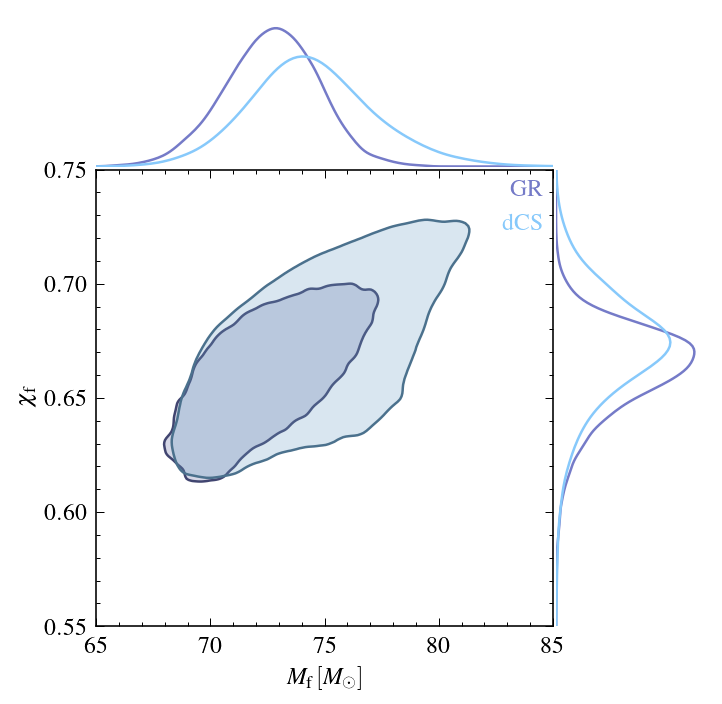

In [12]:
c = ChainConsumer()

c.add_chain(GW150914_gr, parameters=param_list, name=r"GR")
c.add_chain(GW150914_cs, parameters=param_list, name=r"dCS")
c.configure(linestyles=["-", "-"], 
            linewidths=[1.25, 1.25],
            # colors=['k', '#c77dff'],
            # colors=["#FF6D00", "#757BC8"], # not approved
            colors=["#757BC8", "#87c9fb"], # option 1
            # colors=["#128de1", "#757BC8"], # option 2
            # colors=['#22a6c9',  "#757BC8"], # option 3
            # colors=['#7785AC', '#9AC6C5'],
            # colors=['#757A7D', '#920527'],
            sigma2d=False,
            sigmas=[1.65],
            spacing=1/5., 
            shade_alpha=[0.25, 0.25],
            bar_shade=[False, False],
            diagonal_tick_labels=False,
            tick_font_size=12,
            label_font_size=12
           )

fig = c.plotter.plot(figsize="COLUMN",
                     extents={param_list[0]:(65, 85), param_list[1]: (0.55, 0.75)},
                     
                     )

# Trick from corner, which we can apply here as well
axes = np.array(fig.axes).reshape((2, 2))
axes[1, 0].xaxis.set_ticks(ticks=np.arange(65, 85 + 5, 5));
axes[0, 0].axis('off')
axes[1, 0].yaxis.set_ticks(ticks=np.arange(0.55, 0.75 + 0.05, 0.05));
axes[1, 1].axis('off')

# plt.tight_layout()

fig.savefig('fig_output/tmp_GW150914_intrinsic_params_remnant.pdf', bbox_inches='tight')
# fig.savefig('fig_output/tmp_GW150914_intrinsic_params_remnant_option_5.png', bbox_inches='tight')

In [14]:
param_list[1]

'$\\chi_{f}$'

Let's plot all $N_{\rm max} = 0$ posteriors.

In [ ]:
data_GW150914_gr   = np.genfromtxt("/home/hosilva/parspec/pe/GW150914/parspec_runs/gr/cbcBayes/posterior_samples.dat", names=True, dtype=None)
data_GW150914_cs   = np.genfromtxt("/home/hosilva/parspec/pe/GW150914/parspec_runs/p4_l_df0_dtau0_CS_220203_1052/cbcBayes/posterior_samples.dat", names=True, dtype=None)
data_GW150914_edgb = np.genfromtxt("/home/hosilva/parspec/pe/GW150914/parspec_runs/p4_l_df0_dtau0_GB_220227/cbcBayes/posterior_samples.dat", names=True, dtype=None)
data_GW150914_ceft = np.genfromtxt("/home/hosilva/parspec/pe/GW150914/p4_l_df0_dtau0_cEFT/cbcBayes/posterior_samples.dat", names=True, dtype=None)
data_GW150914_qeft = np.genfromtxt("/home/hosilva/parspec/pe/GW150914/p6_l_df0_dtau0_qEFT/cbcBayes/posterior_samples.dat", names=True, dtype=None)

GW150914_gr   = np.vstack([data_GW150914_gr['chi_eff'], data_GW150914_gr['redshift'], data_GW150914_gr['m1'], data_GW150914_gr['m2'], data_GW150914_gr['mtotal'], data_GW150914_gr['mf_evol'], data_GW150914_gr['af_evol']]).T
GW150914_cs   = np.vstack([data_GW150914_cs['chi_eff'], data_GW150914_cs['redshift'], data_GW150914_cs['m1'], data_GW150914_cs['m2'], data_GW150914_cs['mtotal'], data_GW150914_cs['mf_evol'], data_GW150914_cs['af_evol']]).T
GW150914_edgb = np.vstack([data_GW150914_edgb['chi_eff'], data_GW150914_edgb['redshift'], data_GW150914_edgb['m1'], data_GW150914_edgb['m2'], data_GW150914_edgb['mtotal'], data_GW150914_edgb['mf_evol'], data_GW150914_edgb['af_evol']]).T
GW150914_ceft = np.vstack([data_GW150914_ceft['chi_eff'], data_GW150914_ceft['redshift'], data_GW150914_ceft['m1'], data_GW150914_ceft['m2'], data_GW150914_ceft['mtotal'], data_GW150914_ceft['mf_evol'], data_GW150914_ceft['af_evol']]).T
GW150914_qeft = np.vstack([data_GW150914_qeft['chi_eff'], data_GW150914_qeft['redshift'], data_GW150914_qeft['m1'], data_GW150914_qeft['m2'], data_GW150914_qeft['mtotal'], data_GW150914_qeft['mf_evol'], data_GW150914_qeft['af_evol']]).T

In [ ]:
param_list = [r"$\chi_{\rm eff}$", r"$z$",
              r"$m_1 \, [M_{\odot}]$", r"$m_2 \, [M_{\odot}]$", r"$M \, [M_{\odot}]$",
              r"$M_{\rm f} \, [M_{\odot}]$", r"$\chi_{\rm f}$"]

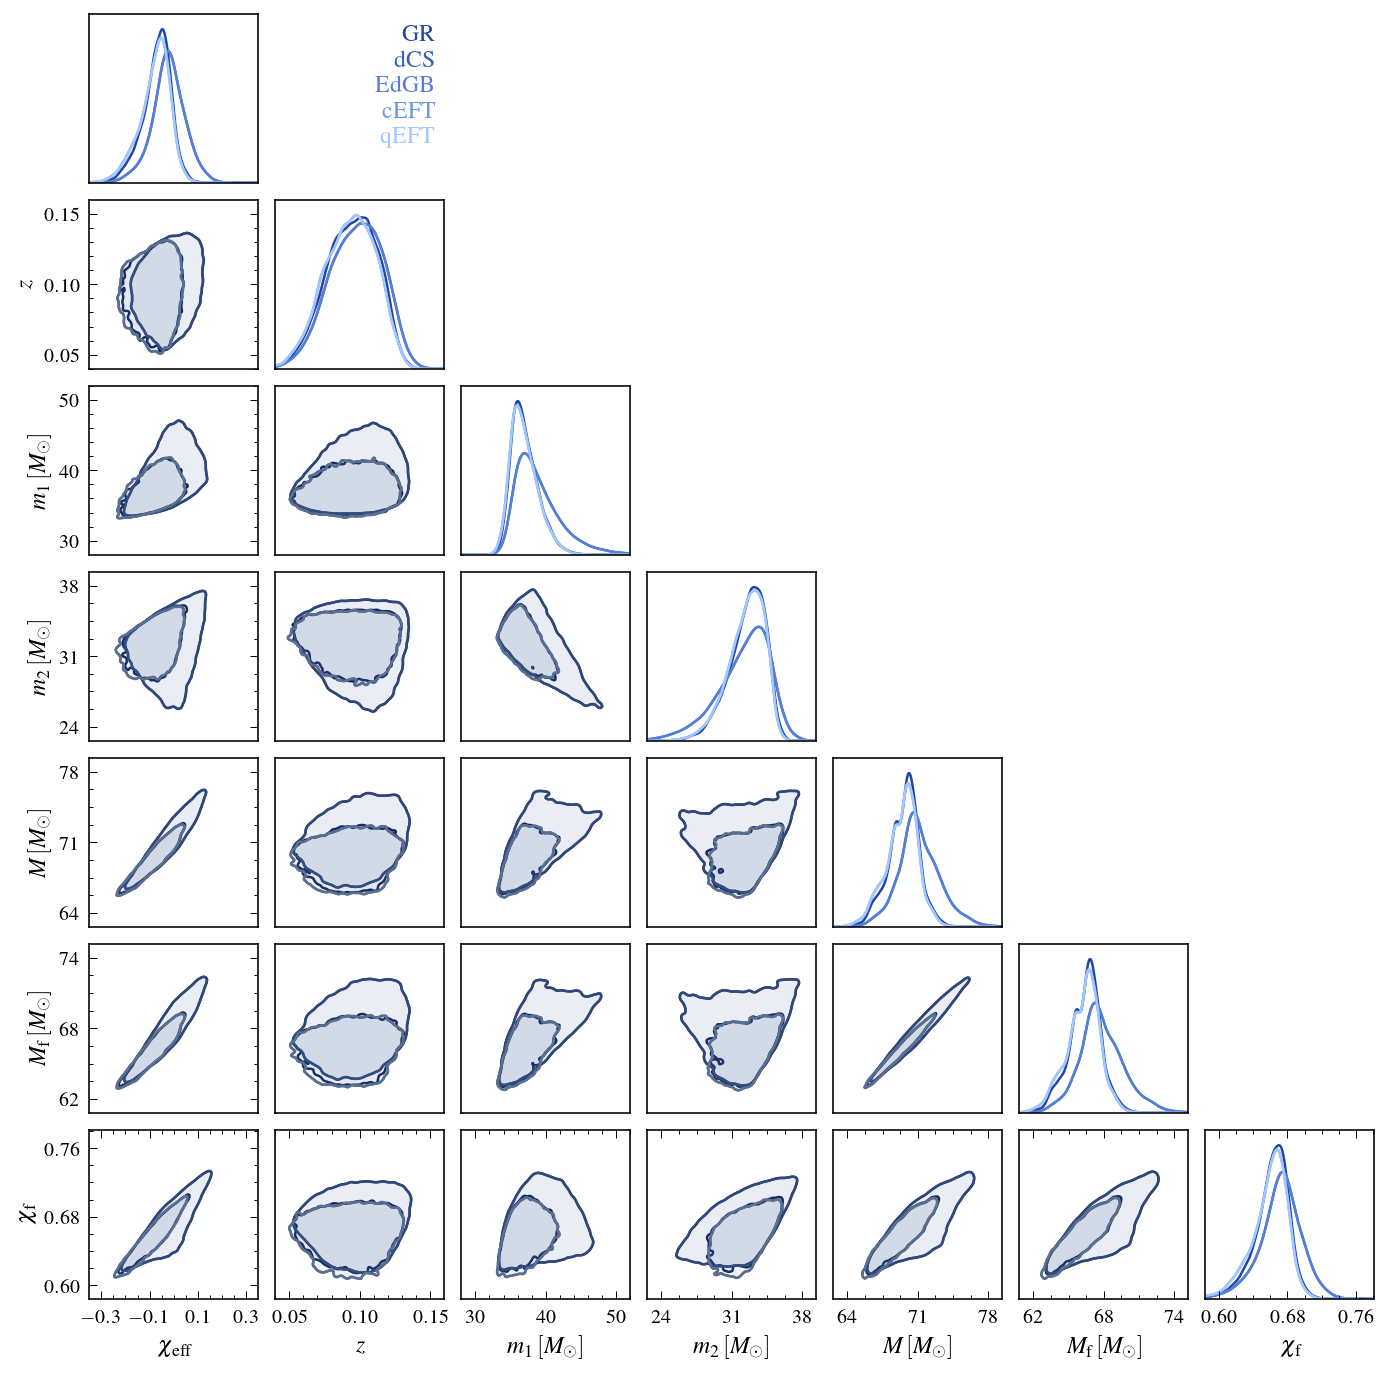

In [107]:
c = ChainConsumer()

c.add_chain(GW150914_gr, parameters=param_list,
            name="GR")

c.add_chain(GW150914_cs, parameters=param_list, 
            name="dCS")

c.add_chain(GW150914_cs, parameters=param_list, 
            name="EdGB")

c.add_chain(GW150914_ceft, parameters=param_list, 
            name="cEFT")

c.add_chain(GW150914_ceft, parameters=param_list, 
            name="qEFT")

c.configure(linestyles=["-", "-", "-", "-", "-"], 
            linewidths=[1.25, 1.25, 1.25, 1.25, 1.25],
            # colors=["#FF6D00", "#757BC8"],
            colors=["#2346a6", "#3660b9", "#567fd9", "#6d99e4", "#a2c8ff"],
            sigmas=[1.645],
            spacing=2, 
            shade_alpha=[0.05, 0.05, 0.05, 0.05, 0.05],
            bar_shade=[False, False, False, False, False],
            diagonal_tick_labels=False,
            tick_font_size=10,
            label_font_size=12,
            legend_location=[0,1])

fig = c.plotter.plot(figsize='GROW',
                     extents={
                              param_list[0]:(-0.35, 0.35),             # chi_{eff}
                              param_list[1]:(0.04, 0.16),               # z
                              param_list[2]:(28, 52),                  # m_1
                              param_list[3]:(24 - 1.4, 38 + 1.4),               # m_2
                              param_list[4]:(64 - 1.4, 78 + 1.4),               # M
                              param_list[5]:(62 - 1.2, 74 + 1.2),               # M_f
                              param_list[6]:(0.584, 0.7816)                # chi_f
                             }
                    )

# Trick from corner, which we can apply here as well
# We want to avoid to many tick labels and avoid having them overlapping with each other
axes = np.array(fig.axes).reshape((7, 7))

# chi_{eff}
axes[6, 0].xaxis.set_ticks(ticks=np.arange(-0.3, 0.20 + 0.20, 0.20));

# z
axes[1, 0].yaxis.set_ticks(ticks=np.arange(0.05, 0.10 + 0.05, 0.05));
axes[6, 1].xaxis.set_ticks(ticks=np.arange(0.05, 0.10 + 0.05, 0.05));

# m_1
axes[2, 0].yaxis.set_ticks(ticks=np.arange(30, 50 + 10, 10));
axes[6, 2].xaxis.set_ticks(ticks=np.arange(30, 50 + 10, 10));

# m_2
axes[3, 0].yaxis.set_ticks(ticks=np.arange(24, 38 + 7, 7));
axes[6, 3].xaxis.set_ticks(ticks=np.arange(24, 38 + 7, 7));

# M
axes[4, 0].yaxis.set_ticks(ticks=np.arange(64, 78 + 7, 7));
axes[6, 4].xaxis.set_ticks(ticks=np.arange(64, 78 + 7, 7));

# M_f
axes[5, 0].yaxis.set_ticks(ticks=np.arange(62, 74 + 6, 6));
axes[6, 5].xaxis.set_ticks(ticks=np.arange(62, 74 + 6, 6));

# chi_f
axes[6, 0].yaxis.set_ticks(ticks=np.arange(0.6, 0.78, 0.08));
axes[6, 6].xaxis.set_ticks(ticks=np.arange(0.6, 0.78, 0.08));

plt.savefig('fig_output/GW150914_intrinsic_params_remnant_all_theories_Nmax_0.pdf', bbox_inches='tight')